# **Bibliotecas e Funções**

## ***Bibliotecas***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from PIL import Image
import os, sys

# Scikit-Learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# OpenCV
import cv2

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator

try:
  import splitfolders
except:
  !pip install split-folders
  import splitfolders

## ***Acessos Externos***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Download Dataset***

In [ ]:
%%time
!gdown --id 16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3
To: /content/covmingrad.rar
100% 2.58M/2.58M [00:00<00:00, 45.4MB/s]
CPU times: user 138 ms, sys: 10.5 ms, total: 149 ms
Wall time: 22.2 s


In [ ]:
!unrar x "/content/covmingrad.rar" "/content/sample_data/treinamento/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/covmingrad.rar

Creating    /content/sample_data/treinamento                          OK
Creating    /content/sample_data/treinamento/non-logging              OK
Extracting  /content/sample_data/treinamento/non-logging/_Id_100000.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100001.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100003.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100011.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100012.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100013.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100014.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100015.tif 

## ***Ajuste do Dataset***

### *Ajuste do tamanho das imagens*

In [ ]:
!mkdir "/content/treinamento/"

In [ ]:
#!/usr/bin/python
path = "/content/sample_data/treinamento/non-logging/"
dirs = os.listdir( path )

!mkdir "/content/sample_data/treinamento/non-logging-resized/"
path2 = "/content/sample_data/treinamento/non-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()

<ipython-input-6-d22fd49a3e69>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imResize = im.resize((50,50), Image.ANTIALIAS)


In [ ]:
#!/usr/bin/python
#!rm "/content/treinamento/selective-pista/extrac_Id_1112.tif.aux.xml"

!rm "/content/sample_data/treinamento/selective-logging/extrac_Id_1112.tif.aux.xml"

path = "/content/sample_data/treinamento/selective-logging/"
dirs = os.listdir( path )

!mkdir "/content/sample_data/treinamento/selective-logging-resized/"
path2 = "/content/sample_data/treinamento/selective-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()

<ipython-input-7-a3937a7380d9>:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imResize = im.resize((50,50), Image.ANTIALIAS)


### *Transformação de .tiff para .jpg*


In [ ]:
!mkdir "/content/sample_data/treinamento/train/"
!mkdir "/content/sample_data/treinamento/train/non-logging-resized"
#yourpath = os.getcwd()
yourpath = "/content/sample_data/treinamento/non-logging-resized"

root1 = "/content/sample_data/treinamento/non-logging-resized"
root2 = "/content/sample_data/treinamento/train/non-logging-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)

A saída de streaming foi truncada nas últimas 5000 linhas.
/content/sample_data/treinamento/non-logging-resized/_Id_51207 resized.tiff
Generating jpeg for _Id_51207 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_45753 resized.tiff
Generating jpeg for _Id_45753 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_60909 resized.tiff
Generating jpeg for _Id_60909 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_88783 resized.tiff
Generating jpeg for _Id_88783 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_1231 resized.tiff
Generating jpeg for _Id_1231 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_89400 resized.tiff
Generating jpeg for _Id_89400 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_128573 resized.tiff
Generating jpeg for _Id_128573 resized.tiff
/content/sample_data/treinamento/non-logging-resized/_Id_185299 resized.tiff
Generating jpeg for _Id_185299 

In [ ]:
!mkdir "/content/sample_data/treinamento/train/selective-loggin-resized/"
#yourpath = os.getcwd()
yourpath = "/content/sample_data/treinamento/selective-logging-resized"

root1 = "/content/sample_data/treinamento/selective-logging-resized"
root2 = "/content/sample_data/treinamento/train/selective-loggin-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)

/content/sample_data/treinamento/selective-logging-resized/extrac_Id_88694 resized.tiff
Generating jpeg for extrac_Id_88694 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_89246 resized.tiff
Generating jpeg for extrac_Id_89246 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_89726 resized.tiff
Generating jpeg for extrac_Id_89726 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_90163 resized.tiff
Generating jpeg for extrac_Id_90163 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_46726 resized.tiff
Generating jpeg for extrac_Id_46726 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_88726 resized.tiff
Generating jpeg for extrac_Id_88726 resized.tiff
/content/sample_data/treinamento/selective-logging-resized/extrac_Id_99861 resized.tiff
Generating jpeg for extrac_Id_99861 resized.tiff
/content/sample_data/treinamento/selectiv

## ***Funções***

## ***Ignorar Warnings***

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Overview do Dataset**

In [ ]:
!mkdir "/content/sample_data/train&test"
!mkdir "/content/sample_data/train&test/non-logging-resized"

input_folder = "/content/sample_data/treinamento/train/"
output_folder = "/content/sample_data/treinamento/train&test"

/content/sample_data/treinamento/train/selective-loggin-resized
/content/sample_data/treinamento/train/non-logging-resized
/content/sample_data/treinamento/train/


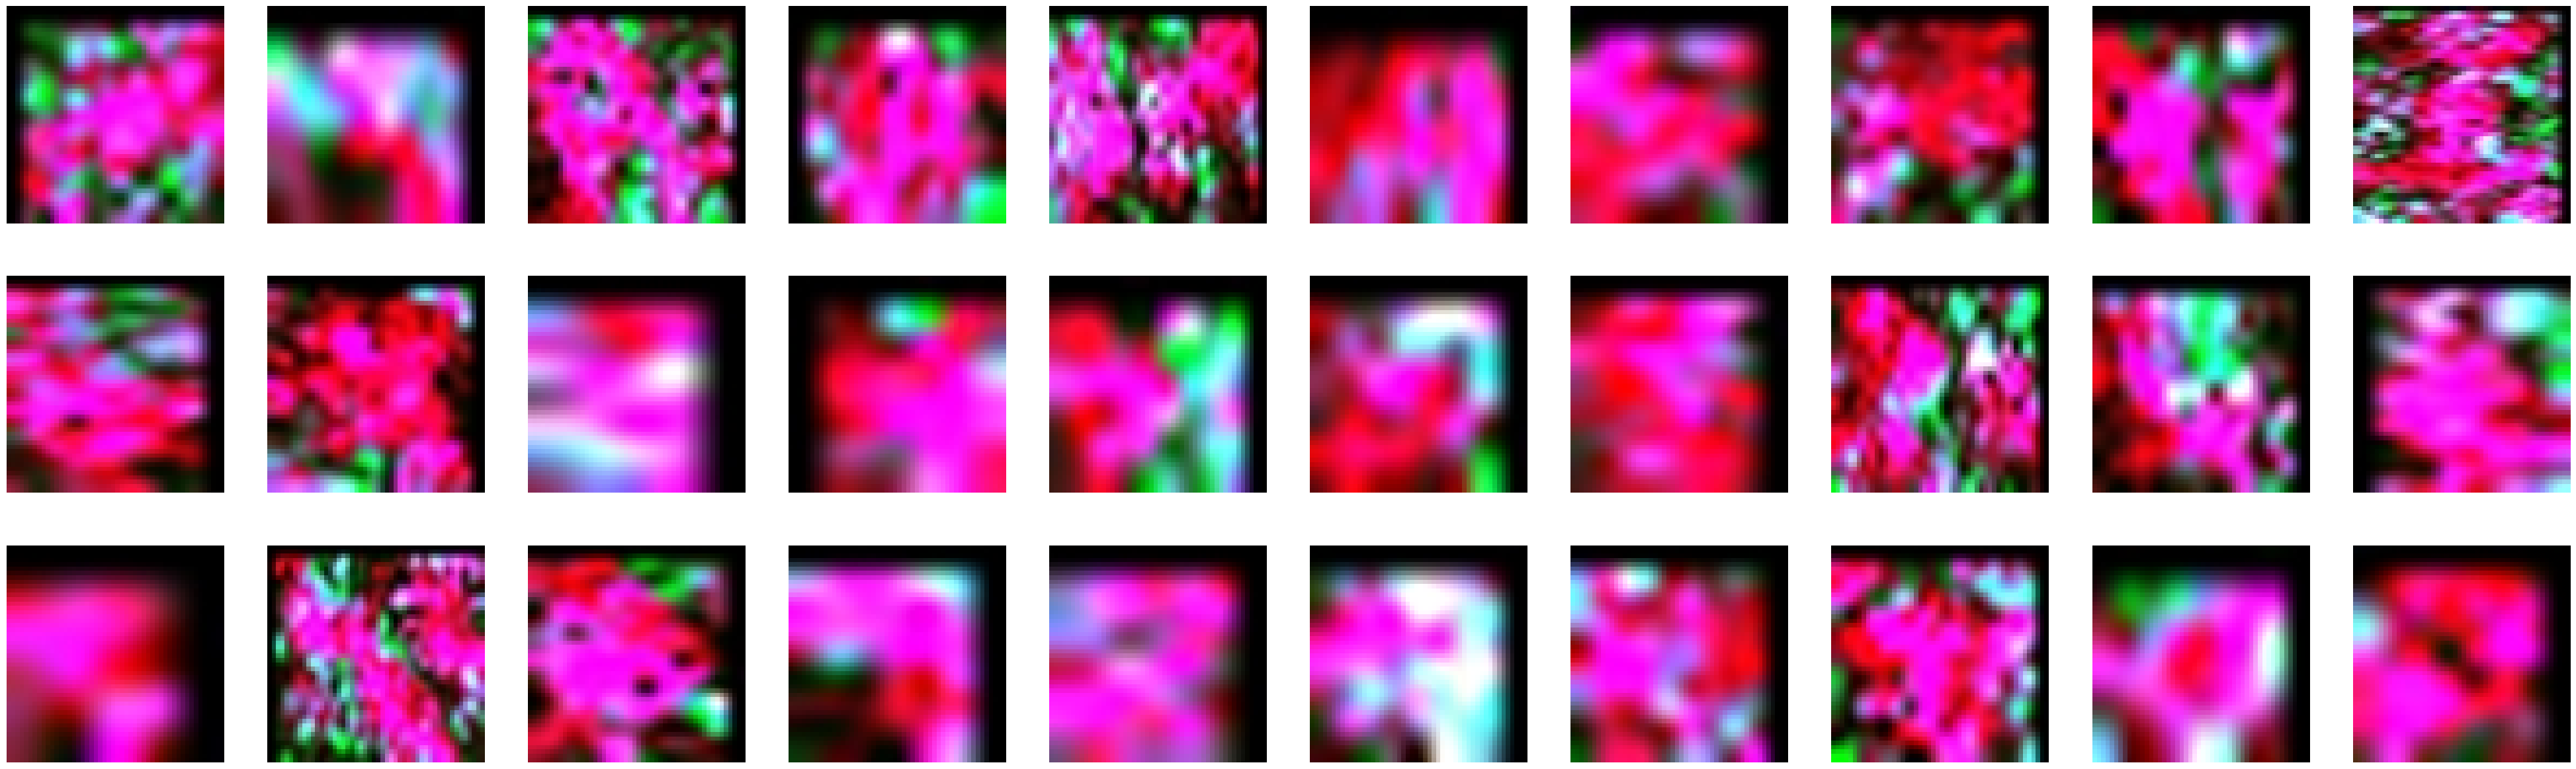

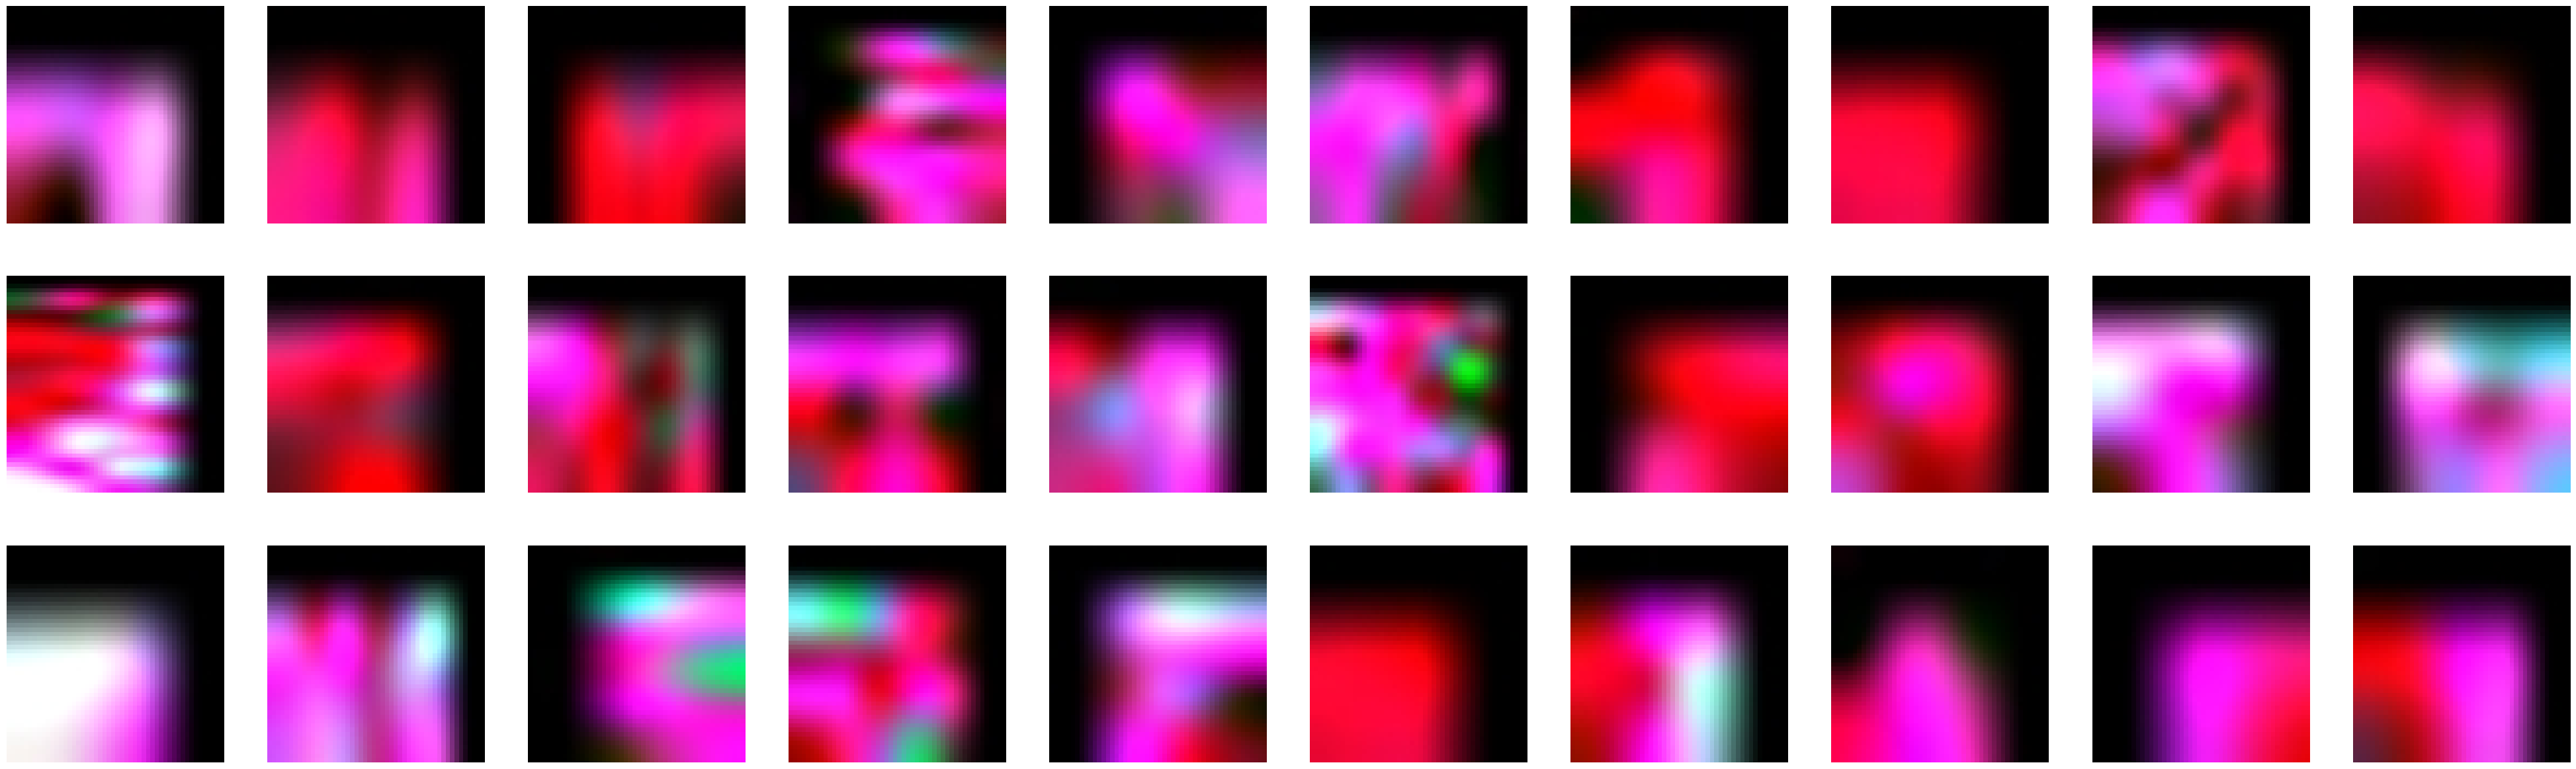

In [ ]:
nrows = 3
ncols = 10
j = 0
for path, dirs, files in os.walk(input_folder, topdown=False):
  print(path)
  if (len(files)>0):
    plt.figure(figsize=(5*ncols,5*nrows))

    for i in range(nrows*ncols):
      n_img = random.randint(0, len(files))
      img = Image.open(os.path.join(path, files[n_img]))

      ax = plt.subplot(nrows, ncols, i+1)
      ax.axis('off')
      plt.imshow(img)

    plt.savefig("/content/drive/MyDrive/Classroom/CAP-421 Aprendizado Profundo/" +str(j) +".pdf")
    j +=1

# **Preparação dos Dados**

## ***Split***

In [ ]:
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.8, .1, .1))

Copying files: 4324 files [00:00, 7386.52 files/s]


## ***Carregar e pré-processar as imagens***

Retornará um tf.data.Datasetque produz lotes de imagens dos subdiretórios class_ae class_b, junto com os rótulos 0 e 1 (0 correspondendo a class_ae 1 correspondendo a class_b).

In [ ]:
image_size = (50, 50)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/train",
    validation_split=.001,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 3459 files belonging to 2 classes.
Using 3456 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['non-logging-resized', 'selective-loggin-resized']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/val",
    validation_split=.7,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 432 files belonging to 2 classes.
Using 302 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/test",
    validation_split=.3,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 433 files belonging to 2 classes.
Using 129 files for validation.


In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

# **Data Augmentation**

Espelhamento, rotação, zoom

- layers.experimental.preprocessing.RandomFlip("horizontal")
- layers.experimental.preprocessing.RandomRotation(0.05)
- layers.experimental.preprocessing.RandomZoom(0.10)

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.10)
    ]
)

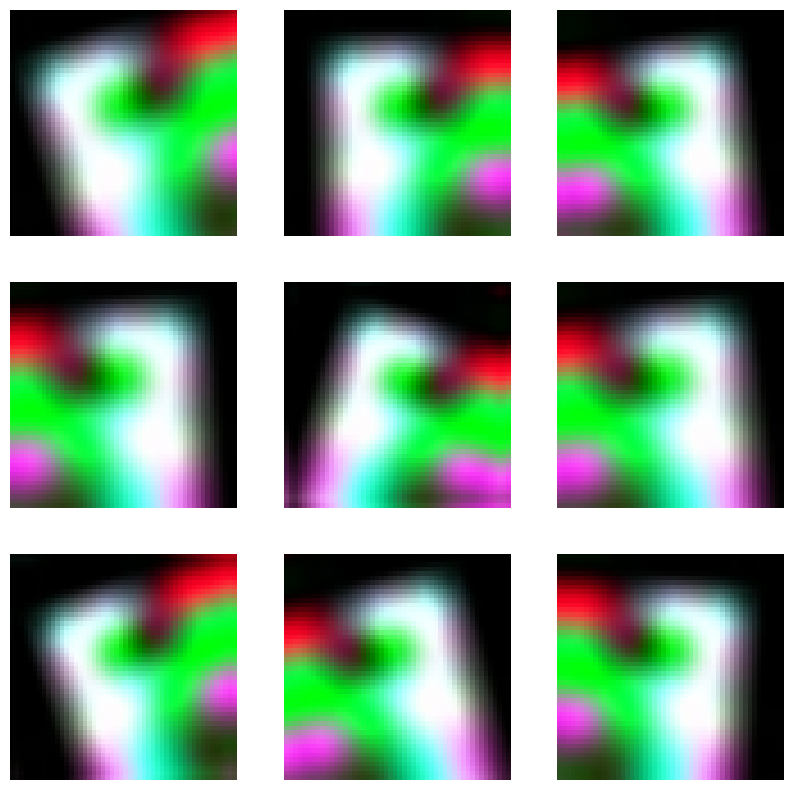

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# **Arquitetura da Rede**

### *ConvNet 2*

In [ ]:
backend.clear_session()

def model_convnet2(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)
  # Image augmentation block
  x = data_augmentation(inputs)

  x = layers.Conv2D(32, kernel_size=(7,7),
                    activation="relu")(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(64, kernel_size=(5,5),
                    activation="relu")(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dropout(0.5)(x)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  outputs = layers.Dense(units, activation=activation)(x)
  return keras.Model(inputs, outputs)

### *ConvNet 3*

In [ ]:
backend.clear_session()

def model_convnet3(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)

  # Image augmentation block
  data_aug = data_augmentation(inputs)

  resc = layers.Rescaling(1./255) (data_aug)
  conv_1 = layers.Conv2D(16, kernel_size=(7,7),
                          padding='same', activation='relu')(resc)
  max_1 = layers.MaxPooling2D()(conv_1)
  conv_2 = layers.Conv2D(32, kernel_size=(5,5),
                          padding='same', activation='relu')(max_1)
  max_2 = layers.MaxPooling2D()(conv_2)
  conv_3 = layers.Conv2D(64, kernel_size=(3,3),
                          padding='same', activation='relu')(max_2)
  max_3 = layers.MaxPooling2D()(conv_3)
  flat = layers.Flatten()(max_3)
  dropout = layers.Dropout(0.5)(flat)
  dense = layers.Dense(128, activation='relu')(dropout)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  outputs = layers.Dense(units, activation=activation)(dense)
  return keras.Model(inputs, outputs)

### *ResNet50*

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

backend.clear_session()

def model_resnet50(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)

  # Image augmentation block
  data_aug = data_augmentation(inputs)

  resize = layers.Resizing(224, 224) (data_aug)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  outputs = ResNet50(include_top=True,
                     weights=None,
                     input_tensor=None,
                     input_shape=None,
                     pooling=None,
                     classes=units,
                     classifier_activation=activation)(resize)

  return keras.Model(inputs, outputs)

### *VGG16*

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

backend.clear_session()

def model_vgg16(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)

  # Image augmentation block
  data_aug = data_augmentation(inputs)

  resize = layers.Resizing(224, 224) (data_aug)

  if num_classes == 2:
    activation = "sigmoid"
    units = 1
  else:
    activation = "softmax"
    units = num_classes

  outputs = VGG16(include_top=True,
                  weights=None,
                  input_tensor=None,
                  input_shape=None,
                  pooling=None,
                  classes=units,
                  classifier_activation=activation)(resize)

  return keras.Model(inputs, outputs)

### *LBP-CNN*

In [ ]:
backend.clear_session()

def LBPExtract(image):
  paddings = tf.constant([[0,0],[1, 1], [1, 1]])
  Im=tf.pad(image, paddings,"CONSTANT")
  M=Im.shape [1]
  N=Im.shape [2]

  # Select the pixels of masks in the form of matrices
  y00=Im[:,0:M-2, 0:N-2]
  y01=Im[:,0:M-2, 1:N-1]
  y02=Im[:,0:M-2, 2:N  ]
  #
  y10=Im[:,1:M-1, 0:N-2]
  y11=Im[:,1:M-1, 1:N-1]
  y12=Im[:,1:M-1, 2:N  ]
  #
  y20=Im[:,2:M, 0:N-2]
  y21=Im[:,2:M, 1:N-1]
  y22=Im[:,2:M, 2:N ]


  # y00  y01  y02
  # y10  y11  y12
  # y20  y21  y22

  # Comparisons
  # 1 -----------------------------------------
  g=tf.greater_equal(y01,y11)
  z=tf.multiply(tf.cast(g, dtype='uint8'),
                tf.constant(1, dtype='uint8') )
  # 2 -----------------------------------------
  g=tf.greater_equal(y02,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(2, dtype='uint8') )
  z =tf.add(z,tmp)
  # 3 -----------------------------------------
  g=tf.greater_equal(y12,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(4, dtype='uint8') )
  z =tf.add(z,tmp)
  # 4 -----------------------------------------
  g=tf.greater_equal(y22,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(8, dtype='uint8') )
  z =tf.add(z,tmp)
  # 5 -----------------------------------------
  g=tf.greater_equal(y21,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(16, dtype='uint8') )
  z =tf.add(z,tmp)
  # 6 -----------------------------------------
  g=tf.greater_equal(y20,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(32, dtype='uint8') )
  z =tf.add(z,tmp)
  # 7 -----------------------------------------
  g=tf.greater_equal(y10,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(64, dtype='uint8') )
  z =tf.add(z,tmp)
  # 8 -----------------------------------------
  g=tf.greater_equal(y00,y11)
  tmp=tf.multiply(tf.cast(g, dtype='uint8'),
                  tf.constant(128, dtype='uint8') )
  z =tf.add(z,tmp)
  #--------------------------------------------
  return tf.cast(z, dtype=tf.float32)

def model_lbp_cnn(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)
  data_aug = data_augmentation(inputs)
  img_1 = layers.Lambda((lambda x: x[:,:,:,0]))(data_aug)
  img_2 = layers.Lambda((lambda x: x[:,:,:,1]))(data_aug)
  img_3 = layers.Lambda((lambda x: x[:,:,:,2]))(data_aug)

  # Normal Path
  data_1 = layers.Conv1D(32, kernel_size=3,
                         activation="relu")(img_1)
  data_1 = layers.Conv1D(64, kernel_size=3,
                         activation="relu")(data_1)

  data_2 = layers.Conv1D(32, kernel_size=3,
                         activation="relu")(img_2)
  data_2 = layers.Conv1D(64, kernel_size=3,
                         activation="relu")(data_2)

  data_3 = layers.Conv1D(32, kernel_size=3,
                         activation="relu")(img_3)
  data_3 = layers.Conv1D(64, kernel_size=3,
                         activation="relu")(data_3)

  data_dense = layers.concatenate(inputs=[data_1, data_2, data_3])
  data_dense = layers.Dense(128, activation='relu')(data_dense)
  data_dense = layers.Flatten()(data_dense)

  # LBP Path
  lbd_1 = layers.Lambda(LBPExtract)(img_1)
  lbp_1 = layers.Conv1D(32, kernel_size=3,
                        activation="relu")(lbd_1)
  lbp_1 = layers.Conv1D(64, kernel_size=3,
                        activation="relu")(lbd_1)

  lbd_2 = layers.Lambda(LBPExtract)(img_2)
  lbp_2 = layers.Conv1D(32, kernel_size=3,
                        activation="relu")(lbd_2)
  lbp_2 = layers.Conv1D(64, kernel_size=3,
                        activation="relu")(lbd_2)

  lbd_3 = layers.Lambda(LBPExtract)(img_3)
  lbp_3 = layers.Conv1D(32, kernel_size=3,
                        activation="relu")(lbd_3)
  lbp_3 = layers.Conv1D(64, kernel_size=3,
                        activation="relu")(lbd_3)

  lbp = layers.concatenate(inputs=[lbd_1, lbd_2, lbd_3])
  lbp = layers.Dense(128, activation='relu')(lbp)
  lbp = layers.Flatten()(lbp)

  # Concatena caminhos
  concat = layers.concatenate(inputs=[data_dense, lbp])
  concat = layers.Dense(256, activation='relu')(concat)

  if num_classes == 2:
      activation = "sigmoid"
      units = 1
  else:
      activation = "softmax"
      units = num_classes

  outputs = layers.Dense(units, activation=activation)(concat)
  return keras.Model(inputs, outputs)

# **Seleção da Rede**

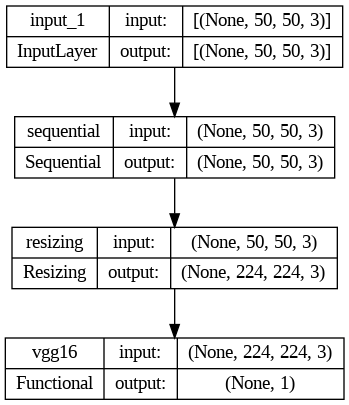

In [ ]:
# model = model_convnet2(input_shape=image_size + (3,), num_classes=2)
# model = model_convnet3(input_shape=image_size + (3,), num_classes=2)
# model = model_resnet50(input_shape=image_size + (3,), num_classes=2)
model = model_vgg16(input_shape=image_size + (3,), num_classes=2)
# model = model_lbp_cnn(input_shape=image_size + (3,), num_classes=2)

keras.utils.plot_model(model, show_shapes=True)

# **Treinamento**

In [ ]:
#@title ***Treinamento***
checkpoint_filepath = '/content/content'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

epochs = 100

model.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

history = model.fit(train_ds,
                    epochs = epochs,
                    callbacks = [early_stop, lr_callback],
                    validation_data = val_ds,
                    verbose=2)

Epoch 1/100
108/108 - 75s - loss: 14.2738 - accuracy: 0.7879 - val_loss: 0.2948 - val_accuracy: 0.8808 - lr: 0.0010 - 75s/epoch - 693ms/step
Epoch 2/100
108/108 - 46s - loss: 0.3203 - accuracy: 0.8652 - val_loss: 0.2945 - val_accuracy: 0.8742 - lr: 0.0010 - 46s/epoch - 427ms/step
Epoch 3/100
108/108 - 45s - loss: 0.6214 - accuracy: 0.8024 - val_loss: 0.3685 - val_accuracy: 0.8742 - lr: 0.0010 - 45s/epoch - 416ms/step
Epoch 4/100
108/108 - 46s - loss: 0.3705 - accuracy: 0.8385 - val_loss: 0.2891 - val_accuracy: 0.8576 - lr: 0.0010 - 46s/epoch - 422ms/step
Epoch 5/100
108/108 - 45s - loss: 0.3069 - accuracy: 0.8704 - val_loss: 0.2969 - val_accuracy: 0.8742 - lr: 0.0010 - 45s/epoch - 421ms/step
Epoch 6/100
108/108 - 46s - loss: 0.3000 - accuracy: 0.8736 - val_loss: 0.2729 - val_accuracy: 0.8874 - lr: 0.0010 - 46s/epoch - 426ms/step
Epoch 7/100
108/108 - 45s - loss: 0.2900 - accuracy: 0.8808 - val_loss: 0.2932 - val_accuracy: 0.8742 - lr: 0.0010 - 45s/epoch - 415ms/step
Epoch 8/100
108/108

# **Resultados**

In [ ]:
plt.rcParams.update({'font.size': 30})

In [ ]:
#@title ***Plot Resultados***
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(acc, 'r', label="Treinamento: %0.4f" %np.mean(acc[-20:]))
ax[0].plot(val_acc, 'g', label="Validação: %0.4f" %np.mean(val_acc[-20:]))
ax[0].set_xlabel('Épocas')
ax[0].set_title('Training and Validoation Accuracy')
ax[0].legend()

ax[1].plot(loss, 'r', label="Treinamento: %0.4f" %np.mean(loss[-20:]))
ax[1].plot(val_loss, 'g', label="Validação: %0.4f" %np.mean(val_loss[-20:]))
ax[1].set_xlabel('Épocas')
ax[1].set_title('Training and Validation loss')
ax[1].legend()

print("Accuracy: ", np.mean(acc[-20:]), np.mean(val_acc[-20:]))
print("Loss: ", np.mean(loss[-20:]), np.mean(val_loss[-20:]))

# **Matriz de Confusão**

In [ ]:
#@title ***Vetor de Teste***
y_true = []
y_pred = []

for data,label in test_ds:
  predictions = model.predict(data)
  y_true.append(label)


  pred = tf.math.round(predictions)
  y_pred.append(pred)

y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

In [ ]:
#@title ***Plot Matriz de Confusão***
classes = (['Extração Ilegal', 'Extração Legal'])
# classes = (['non-logging', 'selective-loggin'])

cm = confusion_matrix(y_true, y_pred)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2.3) #for label size
sns.heatmap(cm/cm.sum(axis=0), annot=True, annot_kws={"size": 30}, fmt='.2%',
            cbar = False, cmap='Purples', xticklabels=classes, yticklabels=classes);
ax.set_ylabel('Classificação Real',fontsize=30)
ax.set_xlabel('Classificação Predita',fontsize=30)

fig.savefig("/content/drive/MyDrive/Classroom/CAP-421 Aprendizado Profundo/Imagens/" +"VGG16.png", bbox_inches='tight')